In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filenames = ['Google_dest.parquet', 'Facebook_dest.parquet', 'Neptun_dest.parquet']

In [12]:
for file in filenames:
    df = pd.read_parquet(filenames[0])
    df.rename(columns={'timestamp' : 'date'}, inplace=True)
    df['timestamp'] = df.date.values.astype(np.int64) / 10 ** 9
    df['difference'] = df.date.diff().dt.total_seconds()
    newFile = file.split('.')[0] + '_new.parquet'
    df.to_parquet(newFile)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


'Google_dest'

In [3]:
df = pd.read_parquet(filenames[0])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [4]:
df.rename(columns={'timestamp' : 'date'}, inplace=True)

In [5]:
df['timestamp'] = df.date.values.astype(np.int64) / 10 ** 9

In [6]:
df['difference'] = df.date.diff().dt.total_seconds()

In [8]:
#df.difference.value_counts().iloc[:50].plot.bar(figsize=(20,10))

In [20]:
df[(df['date'] >= '2018-10-15 12:00:00') & (df['date'] <= '2018-10-15 13:00:00')]#['timestamp'].iloc[0]

,date,timestamp,difference
564266,2018-10-15 12:00:00.563,1.539605e+09,0.577
564267,2018-10-15 12:00:00.869,1.539605e+09,0.306
564268,2018-10-15 12:00:00.872,1.539605e+09,0.003
564269,2018-10-15 12:00:01.525,1.539605e+09,0.653
564270,2018-10-15 12:00:01.527,1.539605e+09,0.002
564271,2018-10-15 12:00:01.559,1.539605e+09,0.032
564272,2018-10-15 12:00:01.584,1.539605e+09,0.025
564273,2018-10-15 12:00:01.584,1.539605e+09,0.000
564274,2018-10-15 12:00:01.584,1.539605e+09,0.000
564275,2018-10-15 12:00:01.619,1.539605e+09,0.035


In [2]:
df = pd.read_parquet('tcp5tuple_http.parquet')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


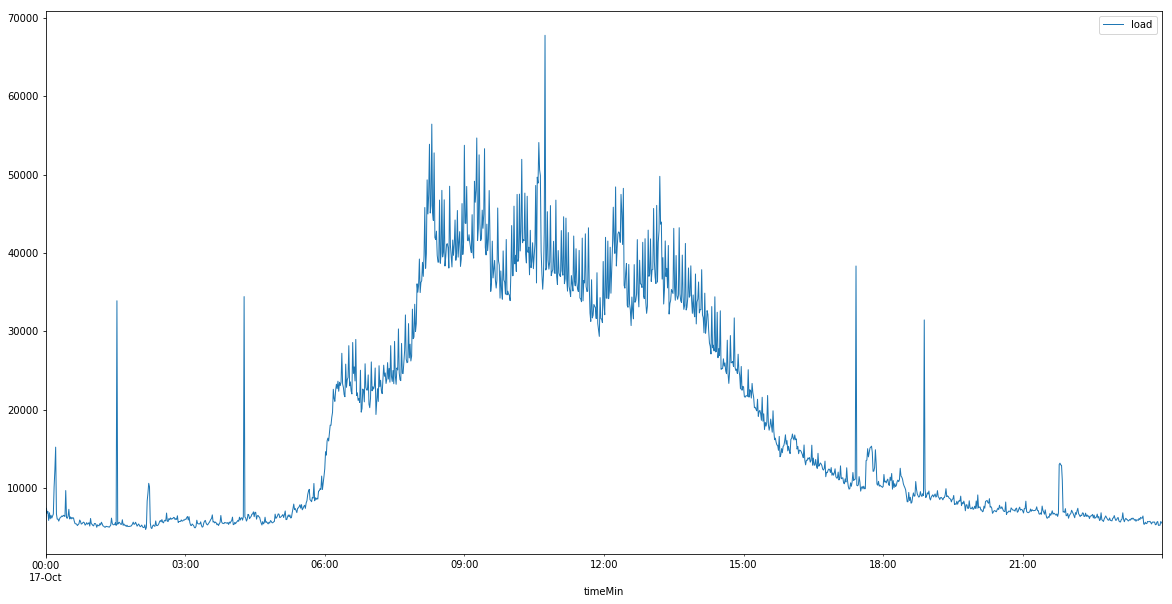

In [10]:
df.loc['2018-10-17' : '2018-10-17'].plot(figsize=(20,10), linewidth=1.0)

In [10]:
df2 = pd.read_parquet('Facebook_dest.parquet')

In [11]:
asd = df2.timestamp.dt.floor('min')#.groupby('timestamp')

In [12]:
asd = asd.to_frame().groupby(by='timestamp').size()

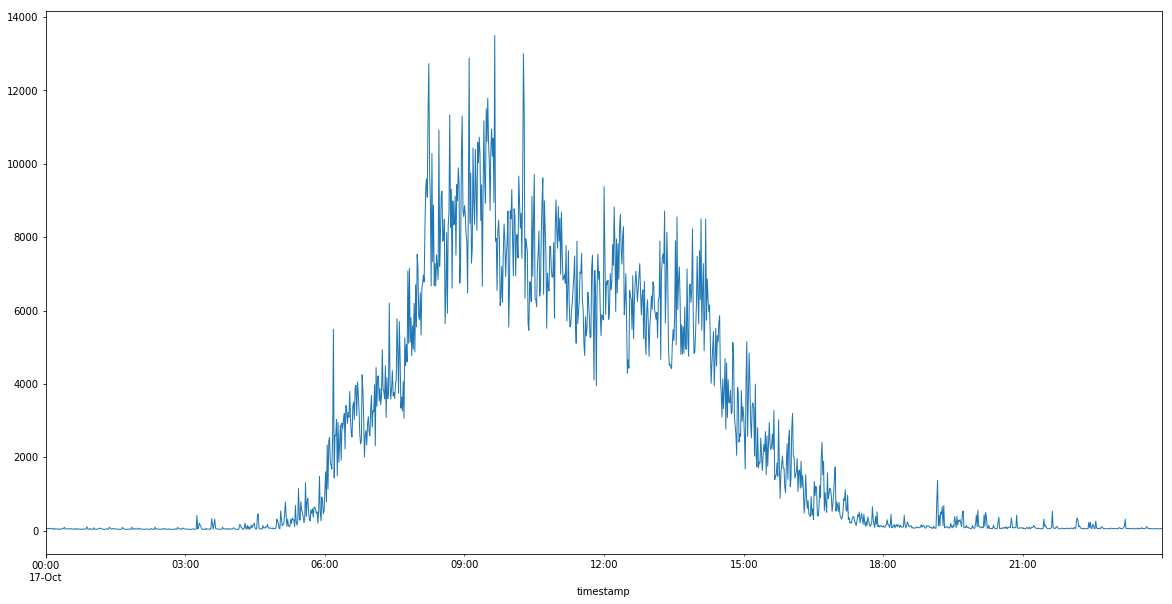

In [13]:
asd.loc['2018-10-17' : '2018-10-17'].plot(figsize=(20,10), linewidth=1.0)